In [1]:
from copy import copy,deepcopy 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from Path import *
from CustomKnot import *
from CustomDatabase import *
from KnotStar import *
from random import *
from KnotGA import *
from KnotAnt import *
np.set_printoptions(threshold=np.inf,linewidth=np.inf,nanstr="n")
pd.options.display.max_colwidth = 100

import sympy as sym

In [2]:
#Tres proyecciones del nudo figura en 8 
k = knotFromPyknotid("4_1")
k1 = CustomKnot([X(3,8,2,7),X(7,4,6,3),X(8,6,1,5),X(5,1,4,2)])
k2 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k3 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])
k1.inverse()
print(k1.forMathematica())
k3.inverse()
print(k3.forMathematica())


print("k1==k2",k1==k2)
print("k2==k3",k2==k3)
print("k1==k3",k1==k3)

print("same k1,k2",areSameKnots2(k1,k2,1000,debug=0))
print("same k2,k3",areSameKnots2(k2,k3,1000,debug=0))
print("same k1,k3",areSameKnots2(k1,k3,1000,debug=0))
print("same k2,k1",areSameKnots2(k2,k1,1000,debug=0))
print("same k3,k2",areSameKnots2(k3,k2,1000,debug=0))
print("same k3,k1",areSameKnots2(k3,k1,1000,debug=0))


PD[X[1,3,8,4],X[2,5,3,6],X[4,8,5,7],X[6,1,7,2]]
PD[X[1,6,10,5],X[3,9,4,8],X[6,1,7,2],X[7,5,8,4],X[9,3,10,2]]
k1==k2 True
k2==k3 False
k1==k3 False
same k1,k2 (True, [''], [''])
same k2,k3 (True, ['createALoop(4,3)', 'createALoop(3,3)', 'undoALoop(7)'], ['reidemeisterIII(10,6,2,check=False)'])
same k1,k3 (True, ['createALoop(3,3)', 'createALoop(2,3)', 'undoALoop(6)'], ['reidemeisterIII(10,6,2,check=False)'])
same k2,k1 (True, [''], [''])
same k3,k2 (True, ['reidemeisterIII(7,1,5,check=False)'], ['createALoop(3,3)'])
same k3,k1 (True, ['reidemeisterIII(7,1,5,check=False)'], ['createALoop(2,3)'])


In [5]:
k2.createALoop(4,3)
k2.createALoop(3,3)
print(k2.undoALoop(7))
print(k3.reidemeisterIII(10,6,2,check=False))
print(k2==k3)


True
True
True


In [8]:
db = singleDatabase(10)

In [9]:
for index, row in db.iterrows():
    print(row["name"])
    knot = CustomKnot(deepcopy(row["crosses"]))
    node = NodeKnot(knot)
    print(len(node.successorsList(100)))

0_1
0
3_1
60
4_1
88
5_1
140
5_2
124
6_1
168
6_2
160
6_3
152
7_1
252
7_2
220
7_3
204
7_4
204
7_5
188
7_6
192
7_7
188
8_1
280
8_2
264
8_3
248
8_4
256
8_5
248
8_6
232
8_7
240
8_8
240
8_9
232
8_10
232
8_11
224
8_12
224
8_13
232
8_14
228
8_15
224
8_16
220
8_17
216
8_18
208
8_19
233
8_20
225
8_21
225
9_1
396
9_2
348
9_3
316
9_4
300
9_5
316
9_6
284
9_7
284
9_8
296
9_9
268
9_10
268
9_11
284
9_12
280
9_13
268
9_14
284
9_15
268
9_16
276
9_17
284
9_18
252
9_19
276
9_20
272
9_21
260
9_22
268
9_23
264
9_24
264
9_25
268
9_26
268
9_27
256
9_28
264
9_29
260
9_30
256
9_31
264
9_32
252
9_33
252
9_34
244
9_35
300
9_36
276
9_37
268
9_38
252
9_39
256
9_40
240
9_41
264
9_42
269
9_43
256
9_44
256
9_45
256
9_46
269
9_47
245
9_48
269
9_49
267
10_1
424
10_2
400
10_3
360
10_4
384
10_5
360
10_6
328
10_7
320
10_8
376
10_9
336
10_10
344
10_11
312
10_12
328
10_13
320
10_14
324
10_15
340
10_16
320
10_17
328
10_18
308
10_19
336
10_20
344
10_21
328
10_22
320
10_23
320
10_24
296
10_25
288
10_26
296
10_27
296
10_28
336
1

In [2]:
k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado

k2.reidemeisterIII(1,19,11,check=False)
k2.undoReidemeisterII(10,20)
k2.reidemeisterIII(7,11,3,check=False)
k2.reidemeisterIII(8,18,10,check=False)
k2.undoALoop(9)
k2.reidemeisterIII(10,2,14,check=False)
k2.createALoop(9,3)
k2.reidemeisterIII(11,17,9,check=False)
k2.reidemeisterIII(12,8,1,check=False)
k2.undoReidemeisterII(11,18)
k2.createALoop(9,2)
k2.reidemeisterIII(9,1,11,check=False)
k2.reidemeisterIII(2,10,16,check=False)
k2.undoALoop(1)

print(k2 == k1)

True


In [3]:
k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado

print("init similarity", similarity(k2,k1))

areSameKnots2(k2,k1,maxStrands=2*k2.numberOfStrands, debug=1)
#areSameKnotAnt(k1,k2,1000,1000000)

init similarity 27.63636363636364
-----
len(queue1) =  1 len(visited1)  0
bestNode1 priority 27.64  mov []

node1 priority 27.64  mov []
321 Mejora bestNode1
len(queue2) =  1 len(visited2)  0
bestNode2 priority 24.45  mov []

node2 priority 24.45  mov []
1 Mejora bestNode2
2 Mejora bestNode2
10 Mejora bestNode2
20 Mejora bestNode2
89 Mejora bestNode2
133 Mejora bestNode2
137 Mejora bestNode2
138 Mejora bestNode2
-----
len(queue1) =  189 len(visited1)  1
bestNode1 priority 18.74  mov ['reidemeisterIII(1,19,11,check=False)']

node1 priority 18.74  mov ['reidemeisterIII(1,19,11,check=False)']
325 Mejora bestNode1
len(queue2) =  110 len(visited2)  1
bestNode2 priority 14.32  mov ['createReidemeisterII(5,13,1,4)']

node2 priority 14.32  mov ['createReidemeisterII(5,13,1,4)']
30 Mejora bestNode2
-----
len(queue1) =  379 len(visited1)  2
bestNode1 priority 13.20  mov ['reidemeisterIII(1,19,11,check=False)', 'undoReidemeisterII(10,20)']

node1 priority 13.20  mov ['reidemeisterIII(1,19,11,chec

In [10]:
k1 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k2 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])

#areSameKnots(k1,k2,maxCrosses=100,debug=1)
#areSameKnotGA(k1,k2,numberOfIndividuals=500,numberOfGenerations=60)
areSameKnotAnt(k1,k2,100)

(True,
 ['.createReidemeisterII(6,8,1)',
  '.reidemeisterIII(10,3,8,check=False)',
  '.undoALoop(X(9,8,10,9))'])

In [6]:
k1 = knotFromPyknotid("3_1")
k2 = deepcopy(k1)
k2.createALoop(5,3)
similarity(k1,k2)

16.0

In [10]:
# Este tarda mucho:
k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado

#print(similarity(k1,k2))
#areSameKnots(k1,k2,100,debug=1)
areSameKnotGA(k1,k2,numberOfIndividuals=1000,numberOfGenerations=300)

Generation  1
  maxSimilarity:  113                                            
  minSimilarity:  60.55555555555557
Generation  2                                                    
  maxSimilarity:  113                                            
  minSimilarity:  60.55555555555557
Generation  3                                                    
  maxSimilarity:  112.81818181818181                             
  minSimilarity:  65.66666666666666
Generation  4                                                    
  maxSimilarity:  112                                            
  minSimilarity:  60.55555555555557
Generation  5                                                    
  maxSimilarity:  110.81818181818181                             
  minSimilarity:  60.55555555555557
Generation  6                                                    
  maxSimilarity:  110.81818181818181                             
  minSimilarity:  60.55555555555557
Generation  7                               

KeyboardInterrupt: 

In [1]:
k1 = knotFromPyknotid("7_6")


k2 = randomMovN(k1,10000,20,percentage=True)
print(k2.crosses)
k2.reduceUnnecessaryMov()

print(k1.crosses)
print(k2.crosses)



NameError: name 'knotFromPyknotid' is not defined

In [6]:
k1 = knotFromPyknotid("7_1")


In [11]:
k1.reidemeisterIII(1,2,3,check=False)

False

In [5]:
for i in range(1,9): 
    print(i,9-i)
for i in range(11,19): 
    print(i,29-i)

1 8
2 7
3 6
4 5
5 4
6 3
7 2
8 1
11 18
12 17
13 16
14 15
15 14
16 13
17 12
18 11


In [10]:
k1  = knotFromPyknotid("3_1")
k2 = deepcopy(k1)
k2.randomMovN(10000,20,percentage=True)

#k1 = CustomKnot([X(1,6,2,7), X(3,8,4,9), X(5,10,6,1), X(7,2,8,3), X(9,4,10,5)]) #5_1
#k2 = CustomKnot([X(1,8,18,7), X(2,2,3,1), X(3,14,4,15), X(5,10,6,11), X(8,15,9,16), X(9,4,10,5), X(12,12,13,11), X(13,6,14,7), X(17,16,18,17)])#5_1_random

#k1 = CustomKnot([X(1,4,2,5), X(3,6,4,1), X(5,2,6,3)]) #3_1
#k2 = CustomKnot([X(1,4,20,3), X(2,5,3,6), X(4,1,5,2), X(6,19,7,20), X(8,15,9,16), X(9,19,10,18), X(11,10,12,11), X(12,7,13,8), X(13,14,14,15), X(16,18,17,17)])

#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
#k2 = CustomKnot([X(1,4,18,3), X(1,9,2,8), X(4,17,5,18), X(7,12,8,13), X(9,3,10,2), X(10,5,11,6), X(11,15,12,14), X(13,6,14,7), X(16,15,17,16)])
# 
#6_1random

#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)])#6_1
#k2 = CustomKnot([X(1,14,22,13), X(2,11,3,12), X(3,19,4,18), X(4,17,5,18), X(6,16,7,15), X(7,9,8,8), X(10,10,11,9), X(12,1,13,2), X(14,21,15,22), X(16,20,17,19), X(20,6,21,5)]) #6_1 random 5000


#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)])  #6_1
#[X(1,6,18,5), X(3,11,4,10), X(6,17,7,18), X(7,12,8,13), X(8,9,9,10), X(11,3,12,2), X(14,13,15,14), X(15,4,16,5), X(16,2,17,1)] #6_1 random 100000
#k2 = CustomKnot([X(1,6,14,5), X(3,9,4,8), X(6,13,7,14), X(7,10,8,11), X(9,3,10,2), X(11,4,12,5), X(12,2,13,1)]) #6_1 random 100000 simplificado


#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
#[X(1,7,18,8), X(1,12,2,13), X(4,9,5,10), X(8,18,9,17), X(10,3,11,4), X(13,6,14,7), X(14,6,15,5), X(15,2,16,3), X(16,12,17,11)] #6_1  random 1000000
#k2 = CustomKnot([X(1,5,14,6), X(1,10,2,11), X(4,7,5,8), X(6,14,7,13), X(8,3,9,4), X(11,2,12,3), X(12,10,13,9)]) #6_1  random 1000000 simplificado

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)]) #7_1
#[X(1,12,2,13), X(3,18,4,19), X(4,7,5,8), X(6,17,7,18), X(11,20,12,1), X(13,2,14,3), X(14,10,15,9), X(15,8,16,9), X(16,5,17,6), X(19,10,20,11)] #7_1 random 10000
#k2 = CustomKnot([X(1,10,2,11), X(3,14,4,15), X(4,7,5,8), X(6,13,7,14), X(9,16,10,1), X(11,2,12,3), X(12,5,13,6), X(15,8,16,9)]) #7_1 random 10000 simplificado

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)])# 7_1
#k2 = CustomKnot([X(2,9,3,10), X(3,12,4,13), X(5,14,6,15), X(8,1,9,2), X(10,7,11,8), X(11,16,12,1), X(13,4,14,5), X(15,6,16,7)])# 7_1 newRandom 30 simplificado

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)]) # 7_1
#k2 = CustomKnot([X(1,10,2,11), X(4,11,5,12), X(5,2,6,3), X(7,14,8,15), X(9,16,10,1), X(12,3,13,4), X(13,6,14,7), X(15,8,16,9)])#7_1 newRandom 10000 simplificado

# Este tarda mucho:
#k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
#k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado



print(k1.crosses)
print(k2.crosses)
k2.reduceUnnecessaryMov()
print(k2.crosses)
print(k2==k1)


[X(1,4,2,5), X(3,6,4,1), X(5,2,6,3)]remaining: <1s                                 
[X(2,13,3,14), X(7,20,8,1), X(11,7,12,6), X(12,5,13,6), X(14,3,15,4), X(15,5,16,4), X(16,1,17,2), X(17,10,18,11), X(18,10,19,9), X(19,8,20,9)]
[X(2,5,3,6), X(3,8,4,1), X(6,1,7,2), X(7,4,8,5)]
False


In [ ]:
#Tres proyecciones del nudo figura en 8 
k1 = CustomKnot([X(3,8,2,7),X(7,4,6,3),X(8,6,1,5),X(5,1,4,2)])
k2 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k3 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])
print(k1.crosses) 
print(k2.crosses) 
print(k3.crosses)

print("k1==k2",k1==k2)
print("k2==k3",k2==k3)
print("k1==k3",k1==k3)

print("same k1,k2",areSameKnots(k1,k2,100))
print("same k2,k3",areSameKnots(k2,k3,100))
print("same k1,k3",areSameKnots(k1,k3,100))
print("same k2,k1",areSameKnots(k2,k1,100))
print("same k3,k2",areSameKnots(k3,k2,100))
print("same k3,k1",areSameKnots(k3,k1,100))


[X(1,5,8,6), X(2,7,3,8), X(4,2,5,1), X(6,3,7,4)]
[X(1,5,2,4), X(3,6,4,7), X(5,1,6,8), X(7,2,8,3)]
[X(1,9,2,8), X(1,6,10,5), X(3,7,4,6), X(4,9,5,10), X(7,3,8,2)]
k1==k2 True
k2==k3 False
k1==k3 False
same k1,k2 (True, [])
same k2,k3 (True, ['createReidemeisterII(2,4,1,4)', 'reidemeisterIII(6,11,4,check=False)', 'undoALoop(5)'])
same k1,k3 (True, ['createReidemeisterII(2,4,0,5)', 'reidemeisterIII(4,11,6,check=False)', 'undoALoop(5)'])
same k2,k1 (True, [])
same k3,k2 (True, ['reidemeisterIII(1,5,9,check=False)', 'undoALoop(10)'])
same k3,k1 (True, ['reidemeisterIII(1,5,9,check=False)', 'undoALoop(10)'])


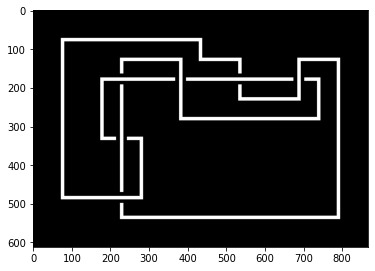

In [4]:


image = k1.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

In [50]:
k = CustomKnot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.createALoop(2,False)
k.createALoop(3,False)
k.createALoop(2,False)
k.createALoop(1,False)
k.createALoop(2,False)
k.createALoop(5,False)
k.createALoop(7,False)


print(k.createReidemeisterII(4,9,True))
print(k.createReidemeisterII(14,22,True))
print(k.createReidemeisterII(13,19,True))
print(k)

True
True
True
Cross: [X(1,15,32,16), X(3,2,4,3), X(6,1,7,2), X(8,7,9,8), X(10,9,11,10), X(11,5,12,4), X(12,5,13,6), X(19,18,20,19), X(21,15,22,14), X(22,13,23,14), X(24,23,25,24), X(25,20,26,21), X(26,27,27,28), X(28,18,29,17), X(29,16,30,17), X(30,31,31,32)]
Planar Diagrams:
[[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21  0  0  0  0  0  0]
 [21 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 21  0  0  0  0  0  0]
 [21 15  6  6  6  0  0  0  0  0  0 22 22 22 22 22 15 21  0  0  0  0  0  0]
 [21 15  6 12 -2 13 13 13 13 13 13 -1 14 14 14 -1 15 21  0  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0  0  0 23  0  0  0 21 21 21  0  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0  0  0 23 23 23 23 23 23 23 23  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0 11 11 11 11 11 11 11 11 11 23  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0 11  8  8  0  0  0 10 10 11 23  0  0  0  0  0]
 [21 15  6 12 -2 11 11 11 11 11  8 -2  9  9  9 -1 10 11 23  0  0  0  0  0]
 [21 15  6  0  4  0  0  0  0  0  0  7  0  0  0 

True
True
True
True
True
True
True
True
True
True
True
True
True
True
Cross: [X(2,1,1,2)]
Planar Diagrams:
[[ 2  2  0]
 [ 2 -2  1]
 [ 0  1  1]]


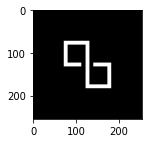

In [135]:
#k = Knot([
#  X(1,9,2,8),
  #X(2,8,1,9),
#  X(3,10,4,11), 
#  X(5,3,6,2),
#  X(7,1,8,12), 
#  X(9,4,10,5), 
#  X(11,7,12,6)])
#k = Knot([X(1,2,4,1),
#         X(2,3,3,4)])
#k = Knot([X(1,2,6,1),
#          X(4,5,5,6),
#          X(2,3,3,4)])
k = CustomKnot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.createALoop(2,False)
k.createALoop(3,False)
k.createALoop(2,False)
k.createALoop(1,False)
k.createALoop(2,False)
k.createALoop(5,False)
k.createALoop(7,False)


print(k.createReidemeisterII(4,9,True))
print(k.createReidemeisterII(14,22,True))
print(k.createReidemeisterII(13,19,True))

print(k.undoALoop(3))
print(k.undoALoop(29))
print(k.undoALoop(25))
print(k.undoALoop(22))
print(k.undoALoop(17))
print(k.undoALoop(8))
print(k.undoALoop(6))

print(k.undoReidemeisterII(2,5))
print(k.undoReidemeisterII(8,12))
print(k.undoReidemeisterII(6,10))
print(k.undoReidemeisterII(4,6))

print(k)

#print(k.planarDiagramZones())
image = k.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')


